In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("budincsevity/szeged-weather")

print("Path to dataset files:", path)

100%|██████████| 2.23M/2.23M [00:00<00:00, 97.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/budincsevity/szeged-weather/versions/1


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from time import perf_counter

In [3]:
df_cols = ['Precip Type','Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)']

In [4]:
df = pd.read_csv(path+'/weatherHistory.csv')
df = df[df_cols]
df['Precip Type'] = df['Precip Type'].map({'rain': 0, 'snow': 1})

In [5]:
df.head()

Precip Type  Temperature (C)  Apparent Temperature (C)  Humidity  \
0          0.0         9.472222                  7.388889      0.89   
1          0.0         9.355556                  7.227778      0.86   
2          0.0         9.377778                  9.377778      0.89   
3          0.0         8.288889                  5.944444      0.83   
4          0.0         8.755556                  6.977778      0.83   

   Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0            14.1197                   251.0          15.8263   
1            14.2646                   259.0          15.8263   
2             3.9284                   204.0          14.9569   
3            14.1036                   269.0          15.8263   
4            11.0446                   259.0          15.8263   

   Pressure (millibars)  
0               1015.13  
1               1015.63  
2               1015.94  
3               1016.41  
4               1016.51

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
dtype: int64

In [8]:
df.nunique()

Precip Type                    2
Temperature (C)             7573
Apparent Temperature (C)    8984
Humidity                      90
Wind Speed (km/h)           2484
Wind Bearing (degrees)       360
Visibility (km)              949
Pressure (millibars)        4971
dtype: int64

In [9]:
df.drop_duplicates()
df.shape

(95936, 8)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'Precip Type'),
  Text(0, 1.5, 'Temperature (C)'),
  Text(0, 2.5, 'Apparent Temperature (C)'),
  Text(0, 3.5, 'Humidity'),
  Text(0, 4.5, 'Wind Speed (km/h)'),
  Text(0, 5.5, 'Wind Bearing (degrees)'),
  Text(0, 6.5, 'Visibility (km)'),
  Text(0, 7.5, 'Pressure (millibars)')])

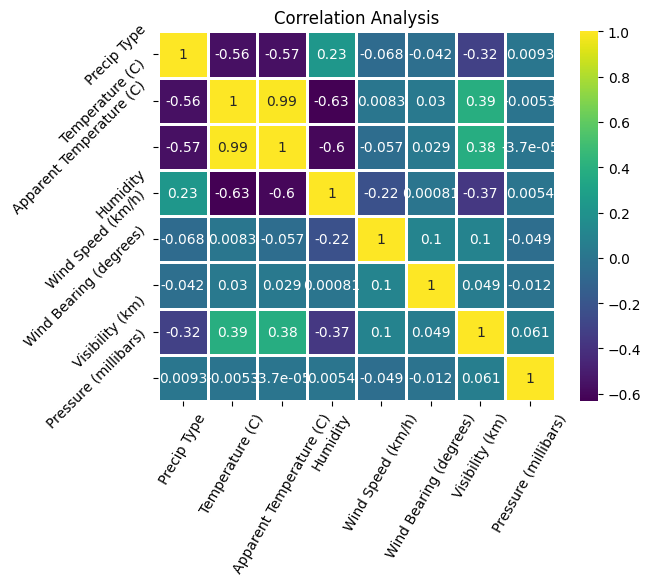

In [10]:
plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(df.corr(), annot=True, lw=1, linecolor='white', cmap='viridis')
plt.xticks(rotation=60)
plt.yticks(rotation=45)

In [11]:
X = df.loc[:, ('Apparent Temperature (C)','Visibility (km)')]
X = X.values.reshape((-1, 2))
print(X.shape)

(95936, 2)


In [12]:
y = df.loc[:, 'Temperature (C)']
y = y.values.reshape((-1, 1))
print(y.shape)

(95936, 1)


In [13]:
# X_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
# print(X_)

In [14]:
# model = LinearRegression().fit(X_,y)
# r_sq = model.score(X_, y)
# print('Coef R^2= ', r_sq)
# print('Intercept= ', model.intercept_)
# print('Coef= ', model.coef_)

In [15]:
!pip install ipympl
%matplotlib widget
from google.colab import output
output.enable_custom_widget_manager()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.9 MB/s eta 0:00:00


In [16]:
from scipy.interpolate import griddata

# Create grid points for mesh
grid_x, grid_y = np.mgrid[
    X[:, 0].min():X[:, 0].max():50j,
    X[:, 1].min():X[:, 1].max():50j
]

# Interpolate real data values onto the grid
grid_z = griddata(X, y.flatten(), (grid_x, grid_y), method='linear')


Degree  2
Time:  0.014495017999990978
Coef R^2=  0.9891887712082189
Intercept=  [1.18768749]
Coef=  [[ 0.81807296  0.2018772   0.00442511 -0.0035074  -0.00641519]]


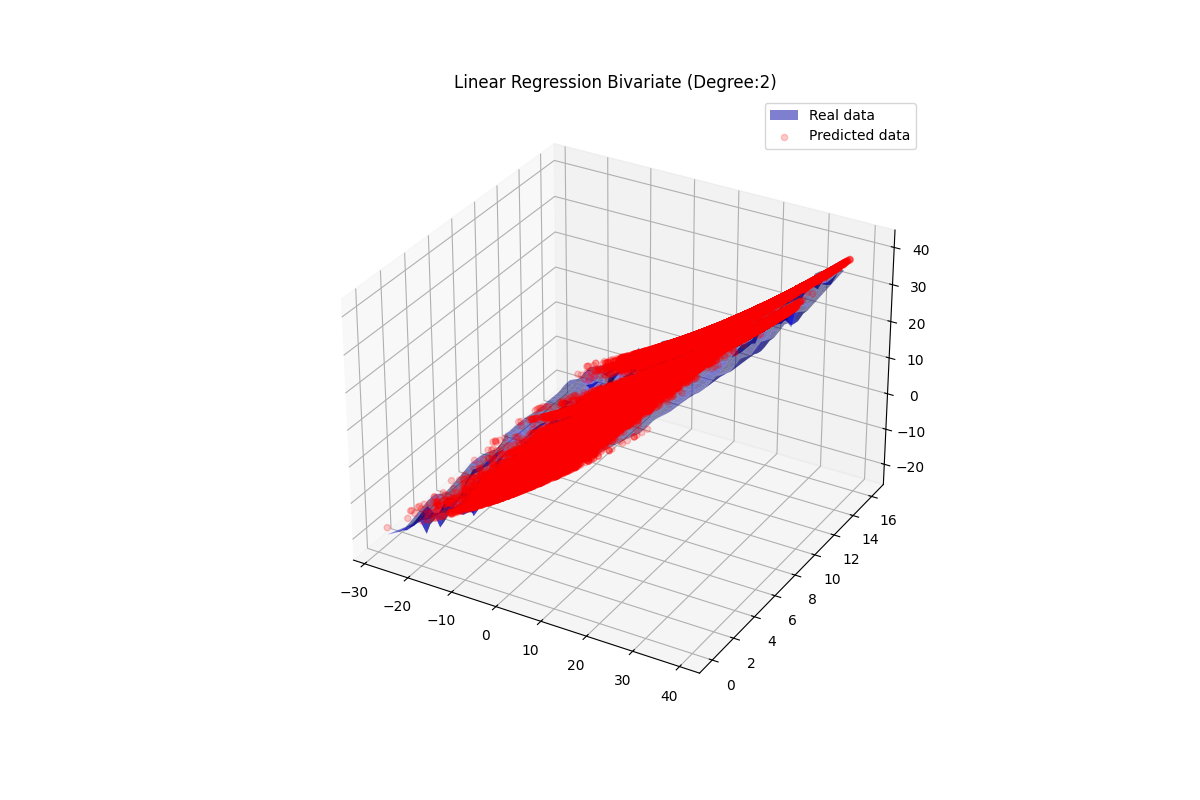

----------------------------------------------------------------------------------------------------
Degree  3
Time:  0.05059702900001639
Coef R^2=  0.9895226223050818
Intercept=  [1.39870609]
Coef=  [[ 8.61946073e-01  1.06158535e-01  1.69457495e-03 -1.28441091e-02
   1.10768549e-02  5.87116973e-05  1.03563459e-04  4.13094519e-04
  -7.89238825e-04]]


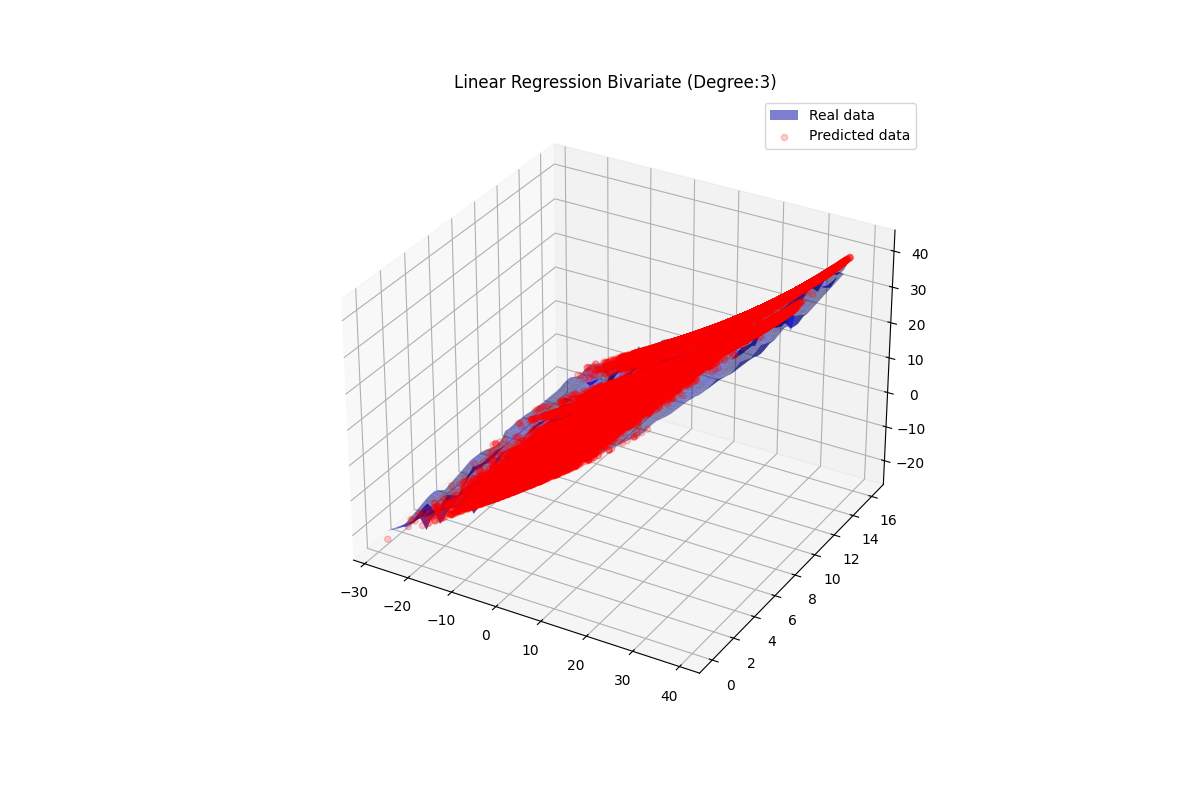

----------------------------------------------------------------------------------------------------
Degree  4
Time:  0.07064964600004942
Coef R^2=  0.989885965607569
Intercept=  [1.39479435]
Coef=  [[ 8.08894345e-01  2.24574652e-02  4.60775218e-03  5.86482324e-04
   3.17010834e-02  2.24675795e-04 -2.49525290e-04 -1.56163360e-03
  -2.22966928e-03 -6.35574654e-06  7.67830821e-06  2.45740625e-06
   7.76330103e-05  3.22582267e-05]]


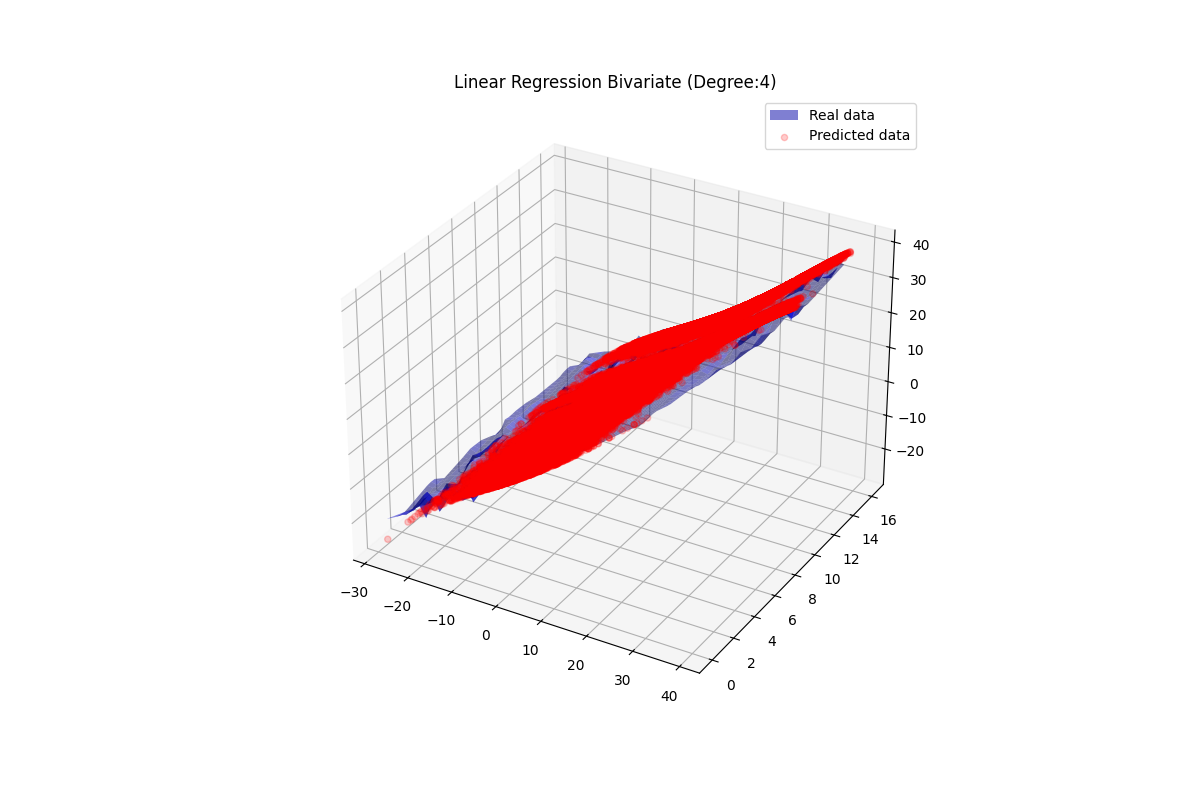

----------------------------------------------------------------------------------------------------
Degree  5
Time:  0.1398638280000455
Coef R^2=  0.9901765851590238
Intercept=  [1.31598268]
Coef=  [[ 8.17856626e-01  4.27650111e-01 -3.89527215e-04  7.60560566e-03
  -1.45198513e-01  2.55168523e-04  4.22831625e-04 -4.46419249e-03
   2.66769716e-02  6.67680328e-06  1.50967481e-05 -1.24680082e-04
   4.39405414e-04 -1.95267641e-03 -3.07780256e-07  3.52020688e-08
  -8.35594171e-07  5.99241721e-06 -1.30007591e-05  4.83244563e-05]]


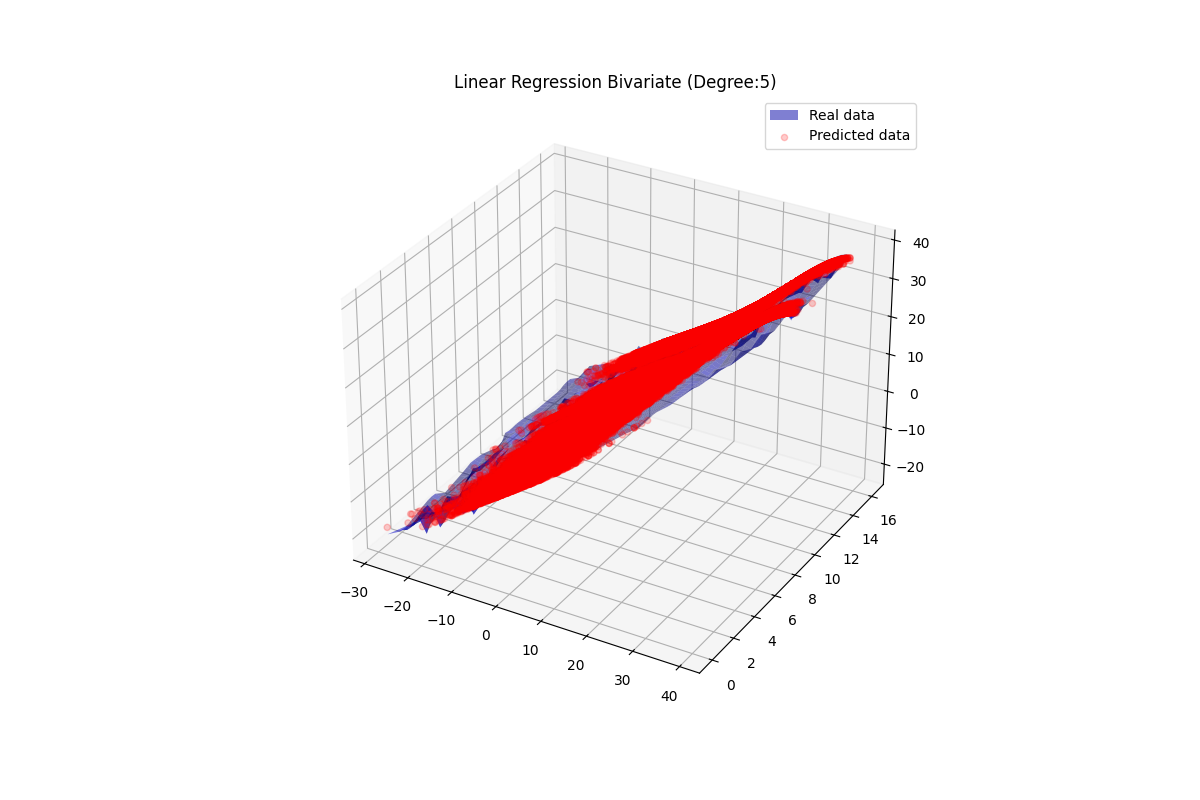

----------------------------------------------------------------------------------------------------
Degree  6
Time:  0.20036789400000998
Coef R^2=  0.9902515909346773
Intercept=  [1.32226901]
Coef=  [[ 8.43206867e-01  1.29572343e-01  3.76548065e-03 -5.00247071e-02
   8.56892363e-02  2.87035177e-04 -1.62686119e-03  1.95979911e-02
  -3.67307300e-02 -5.73772127e-06  3.11041663e-05  3.11597546e-04
  -3.43938584e-03  5.87797226e-03 -3.82954648e-07  1.39654421e-06
  -9.42940860e-07 -3.42745394e-05  2.53034247e-04 -3.95294300e-04
   7.47771155e-09 -3.14492389e-08  2.02759106e-09 -3.19066910e-08
   1.20033113e-06 -6.50105583e-06  9.38904207e-06]]


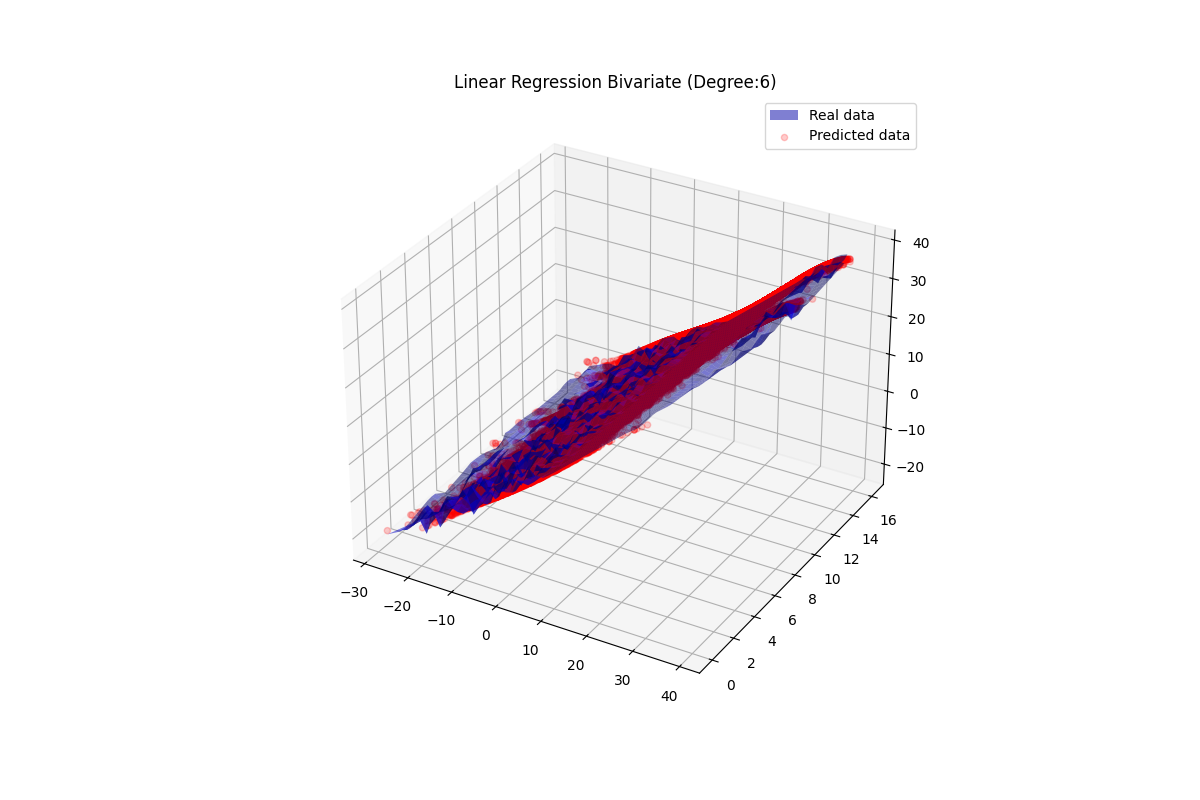

----------------------------------------------------------------------------------------------------
Degree  7
Time:  0.35167099200003804
Coef R^2=  0.9903538403387517
Intercept=  [1.33195913]
Coef=  [[ 8.18859946e-01  9.46151731e-03  4.34573185e-03  3.33261106e-02
   1.72071408e-01  1.56055115e-04 -3.12869211e-03 -2.05320645e-02
  -5.58526372e-02  5.52468998e-06 -6.51320640e-05  7.59045661e-04
   4.78625162e-03  7.41317854e-03 -2.08446374e-07  3.66358020e-06
   2.86759763e-05 -1.19283016e-04 -5.69609577e-04 -3.94394462e-04
  -1.82104725e-08 -9.16419412e-08 -1.91097841e-07 -2.76682028e-06
   8.42189454e-06  3.29372152e-05  3.82847166e-06  4.33676444e-10
   3.47225590e-10  2.94450767e-09  2.62475932e-09  8.07211663e-08
  -2.07670211e-07 -7.25267094e-07  1.85965550e-07]]


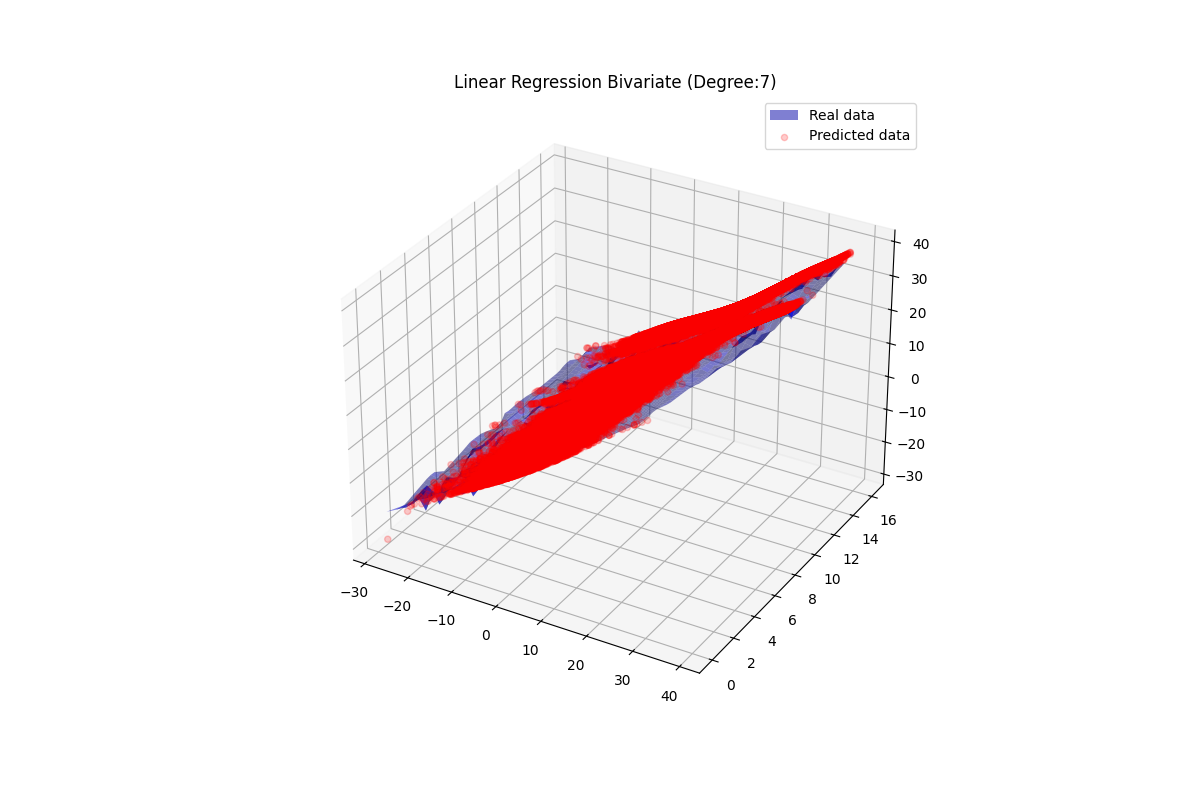

----------------------------------------------------------------------------------------------------
Degree  8
Time:  0.3068653749999726
Coef R^2=  0.9904068124746905
Intercept=  [1.3125366]
Coef=  [[ 8.29141291e-01  3.93181716e-01  1.61030880e-03 -1.35032075e-02
  -3.54892464e-01  2.57107547e-04  2.42181659e-03  2.78108486e-03
   1.96949475e-01  3.37206673e-06  1.43902062e-05 -1.52433566e-03
   4.95470930e-04 -5.20653836e-02 -4.48002377e-07 -4.00115010e-06
  -2.63962396e-05  3.53804309e-04 -2.26523647e-04  7.25579273e-03
   4.06649657e-09  1.00762461e-07  1.53819161e-06  6.04348289e-06
  -4.35494387e-05  2.45468200e-05 -5.44227147e-04  2.39431885e-10
  -2.06868840e-09 -2.99237775e-08 -1.03763071e-07 -4.46997408e-07
   2.56160823e-06 -1.03883757e-06  2.07083310e-05 -7.84694532e-12
   7.95457311e-11 -7.60725649e-11  1.32559559e-09  2.10550928e-09
   1.05670966e-08 -5.59795212e-08  1.46676221e-08 -3.13059063e-07]]


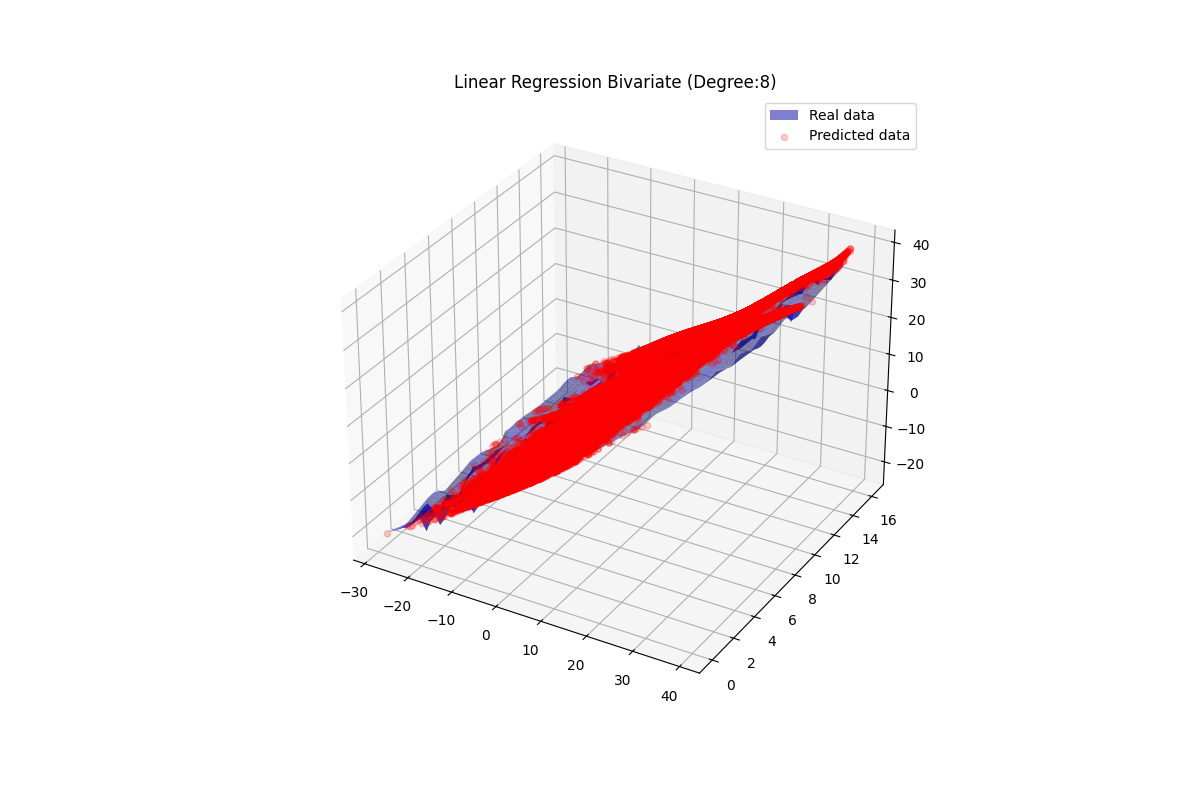

----------------------------------------------------------------------------------------------------


In [18]:
for i in range(2, 9):
  X_ = PolynomialFeatures(degree=i, include_bias=False).fit_transform(X)
  t1 = perf_counter()
  model = LinearRegression().fit(X_,y)
  t2 = perf_counter()
  y_pred = model.predict(X_)
  print("Degree ", i)
  print("Time: ", t2-t1)
  r_sq = model.score(X_, y)
  print('Coef R^2= ', r_sq)
  print('Intercept= ', model.intercept_)
  print('Coef= ', model.coef_)

  fig = plt.figure(figsize=(12, 8))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(grid_x, grid_y, grid_z, color='blue', alpha=0.5, label='Real data')
  ax.scatter(X[:, 0], X[:, 1], y_pred, color='red', alpha=0.2, label='Predicted data')
  ax.set_title(f"Linear Regression Bivariate (Degree:{i})")
  ax.legend()
  plt.show()
  print(100*'-')